# Homework 2

## Pair Programming Group Number: 17
## Members of Team: Jazmin Reyna

#### Practicing using numpy to do math, and more visualizations

More fun using the numerical package, numpy, a touch of pandas, and exercising your math vocabulary. 

In [ ]:
# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://gist.githubusercontent.com/yanyanzheng96/8fe13cc4b7c6a1391d4841018340a627/raw/f17479a580783a810cfe119186e63b5b28a87b4c/melb_data.csv'
df = pd.read_csv(url)
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Question 1 - Discrete PDF
Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function of that vector using a histogram.  You should use [numpy random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create the vector. Always label your axes and give your plots titles (this holds for all questions). 

Text(0, 0.5, 'Data values')

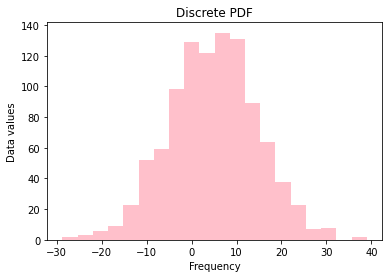

In [ ]:
# mean and standard deviation
m, sd = 5, 10

# create normal distribution of 1000 numbers
v = np.random.normal(m, sd, 1000)

# create histogram and store values
count, bins, ignore = plt.hist(v, bins = 20, color = 'pink')

pdf = count / sum(count)

# create labels
plt.title('Discrete PDF')
plt.xlabel('Frequency')
plt.ylabel('Data values')


## Question 2 - Discrete CDF

Create a discrete cumulative density function plot using the same vector as the last question using a line graph.
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$.  You can use the matplotlib pyplot function [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) to draw the line, and to draw a star at the point $x$.  Use the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function to annotate the graph. 

Text(13, 0.6, 'Indicates point where 80% \nof the data lies below and \n20% of the data lies above')

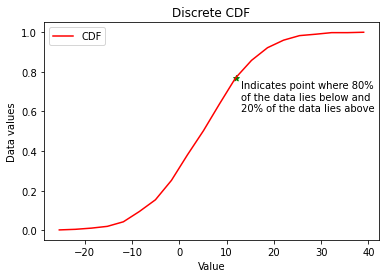

In [ ]:
# establish cdf
cdf = np.cumsum(pdf)

# plot cdf
plt.plot(bins[1:], cdf, label="CDF", color ='r')

cdf_series = pd.Series(cdf)

cdf_list = list(cdf_series)
bins_list = list(bins[1:])


# get index of value closest to 80% but not over
get_index = []

for i in cdf_list:
  if i <= 0.8:
    get_index.append(i)

idx = cdf_list.index(get_index[-1])
plt.scatter(bins_list[idx], cdf_list[idx], marker = '*', color = 'green')

# create labels
plt.xlabel('Value')
plt.title('Discrete CDF')
plt.ylabel('Data values')
plt.legend()
plt.text(13, .6, 'Indicates point where 80% \nof the data lies below and \n20% of the data lies above')

## Question 3 - Univariate Analysis

Load in the data from melb_data.csv into a pandas DataFrame.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East
  
You should use the [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function, with the parameter `by`. 

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


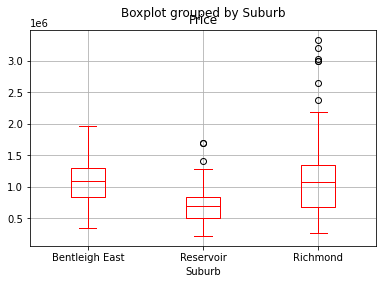

In [ ]:
# create new df grouped by objects only in select suburbs
df_bp = df[df['Suburb'].isin(['Reservoir', 'Richmond','Bentleigh East'])]

# create boxplot by price
bp = df_bp.boxplot('Price', by = 'Suburb', color = 'red')


## Question 4 - Rotation with Matrices

Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45 degrees (clockwise or counter-clockwise, you choose!) and draw the result.  You must use numpy's [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to accomplish the rotation. Numpy also has functions for `sin` and `cos`.  You should also get [pi](https://numpy.org/doc/stable/reference/constants.html?highlight=pi#numpy.pi) from the numpy package. 

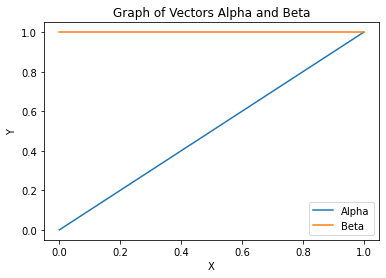

In [ ]:
# create points
p = [0, 1]
q = [0, 1]
r = [1, 0]
s = [1, 1]

# plot alpha and beta
plt.plot(p, q, label = 'Alpha')
plt.plot(r, s, label = 'Beta')

# label graph
plt.title('Graph of Vectors Alpha and Beta')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend()

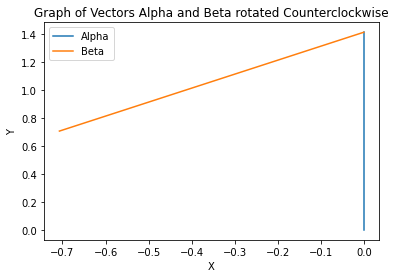

In [ ]:
# establish angle theta
theta = np.pi/4

# establish rotation matrix
r_mat = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

# establish start and end points of alpha
alpha_from = np.array([0,0])
alpha_to = np.array([1,1])

# establish start and end points of beta
beta_from = np.array([1,1])
beta_to = np.array([0,1])

# commence rotation counterclockwise
r_a_f = np.matmul(r_mat, alpha_from)
r_a_t = np.matmul(r_mat, alpha_to)

b_a_f = np.matmul(r_mat, beta_from)
b_a_t = np.matmul(r_mat, beta_to)

# plot new rotated points
plt.plot((r_a_f[0], r_a_t[0]), (r_a_f[1], r_a_t[1]), label = 'Alpha')
plt.plot((b_a_f[0], b_a_t[0]), (b_a_f[1], b_a_t[1]), label = 'Beta')

# label graph
plt.title('Graph of Vectors Alpha and Beta rotated Counterclockwise')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

## Question 5 - Solving Systems of Equations with Matrices

Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficients of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficients, the second column contains the $y$ coefficients, and the third column contains the $z$ coefficients. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

Use the numpy [linear algebra inverse function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to find $A^{-1}$.

In [ ]:
# establish coefficients
A = np.array([[2, 1, 1], [4, -6, 0], [-2, 7, 2]])

# estbalish right side of equation
b = np.array([5, -2, 9])

# establish inverse of A
A_inv = np.linalg.inv(A)

# solve using matrix multiplication
sol = np.matmul(A_inv, b)
sol

array([1., 1., 2.])